# Airbnb Listing Analysis

### Scenario

As Airbnb has grown in popularity, it has increasingly become the focus of regulations designed to limit the number of properties listed in each city.

### Objective

##### Analyze Paris listings

- What are the factors affecting pricing? 
- Did regulations adopted in 2015 impact the number of listings in the market?

### Workflow

1. Explore and profile the data to correct any data quality issues
2. Prepare and reformat the data for visualization
3. Visualize the data and identify key insights and recommendations

#### Import Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format',  '{:,.3f}'.format)

In [143]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [144]:
listings = pd.read_csv('Airbnb+Data/Airbnb Data/Listings.csv', encoding='ISO-8859-1', 
                       low_memory=False, parse_dates=['host_since'])

In [145]:
# See first 3 rows
listings.head(3)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [146]:
# How many rows and how many columns
listings.shape

(279712, 33)

##### Observations
- There are roughly 279,700 listings in the dataset

In [147]:
# Check columns and datatypes
listings.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

#### Data Exploration

In [148]:
# How many listings for each city?
listings['city'].value_counts(dropna=False)

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

##### Observations
- Paris has the most listings, followed by New York, then Sydney

#### Data Analysis

In [149]:
# Create a dataframe for all Paris listings
paris_df = listings.loc[listings['city']=='Paris']

In [150]:
# How many rows and columns?
paris_df.shape

(64690, 33)

In [151]:
# Check first 3 rows
paris_df.head(3)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [152]:
# Filter dataframe for only required columns for analysis
paris_filtered = paris_df.loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [153]:
# Check first 5 rows
paris_filtered.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [154]:
# Check statistics for numerical columns
paris_filtered.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


##### Observations
- The median number of people that an Airbnb accomodates is 2, and the maximum is 16
- The median price per night for a listing in Paris is 80 Euros while the maximum is 12,000 Euros

In [155]:
# How many null values?
paris_filtered.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

#### 1. What is the average price per night for each neighbourhood in Paris and how many listings are there?

In [156]:
paris_listings_neighbourhood = paris_filtered.groupby('neighbourhood').agg({'price': 'mean', 'neighbourhood':'count'})

In [157]:
# Sort by Price in descending order (highest to lowest)
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price')

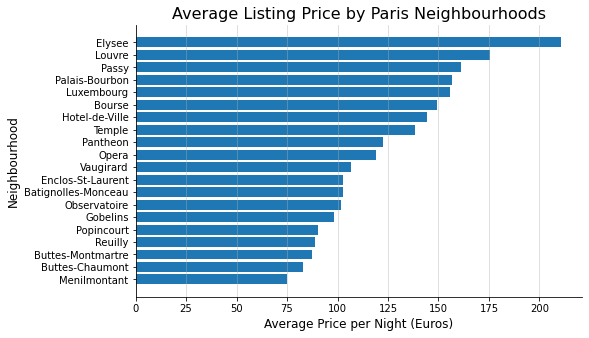

In [158]:
# Plot Average Price per Night by Neighbourhood
fig, ax = plt.subplots(figsize=(8,5))

ax.barh(paris_listings_neighbourhood.index, paris_listings_neighbourhood['price'])
ax.grid(alpha=0.5, axis='x')

ax.set_title('Average Listing Price by Paris Neighbourhoods', size=16)
ax.set_xlabel('Average Price per Night (Euros)', size=12)
ax.set_ylabel('Neighbourhood', size=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

#### Observations
- The most expensive neighbourhood in Paris is Elysee with an average price per night of roughly 210 Euros.
- The least expensive neighbourhood in Paris is Menimontant with an average price per night of roughly 75 Euros.

#### What is the average price per night by accomodation capacity for listings in Elysee?

In [159]:
most_expensive = paris_filtered.query("neighbourhood == 'Elysee'")

most_expensive.shape

(1768, 5)

In [160]:
paris_listings_accomodations = most_expensive.groupby('accommodates').agg({'price': 'mean', 'neighbourhood': 'count'})

sorted_df = paris_listings_accomodations.sort_values(by='price')

sorted_df

,price,neighbourhood
accommodates,,
0,0.000000,6
1,79.522222,90
3,152.828767,146
2,155.103352,716
4,212.096070,458
5,328.817073,82
6,355.508571,175
8,405.518519,27
7,411.538462,26


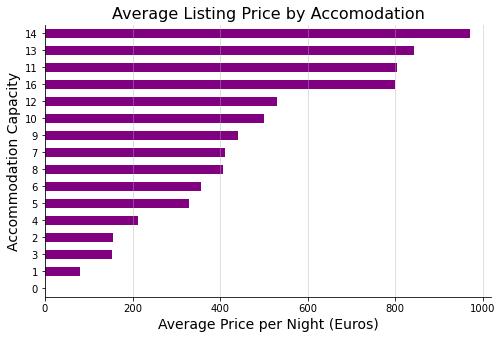

In [165]:
fig, ax = plt.subplots(figsize=(8,5))

sorted_df['price'].plot(kind='barh', color='purple')

# ax.set_yticks(positions)

ax.grid(alpha=0.5, axis='x')

ax.set_title('Average Listing Price by Accomodation', size=16)
ax.set_xlabel('Average Price per Night (Euros)', size=14)
ax.set_ylabel('Accommodation Capacity', size=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

#### Observations
- There are 1768 listings in Elysee
- The accommodation capacity with the highest average price per night in Elysee is 14. 
- The reason that 16 isn't the highest because there is only 1 listing which accommodates 16 people.
- A majority of the listings accommodate 2 people

#### How many listings each year and what was the average price each year?

In [111]:
# paris_filtered.set_index('host_since').resample('Y').agg({'price': 'mean', 'neighbourhood': 'count'})

In [110]:
paris_listings_over_time = (paris_filtered.groupby(paris_filtered['host_since'].dt.year)
                                          .agg({'price': 'mean', 'neighbourhood': 'count'})
                           )

paris_listings_over_time

,price,neighbourhood
host_since,,
2008.0,77.750000,4
2009.0,159.641509,106
2010.0,125.031250,416
2011.0,124.828230,1339
2012.0,111.578615,4592
2013.0,107.096414,8142
2014.0,100.253800,10922
2015.0,103.646250,12147
2016.0,114.159847,8871


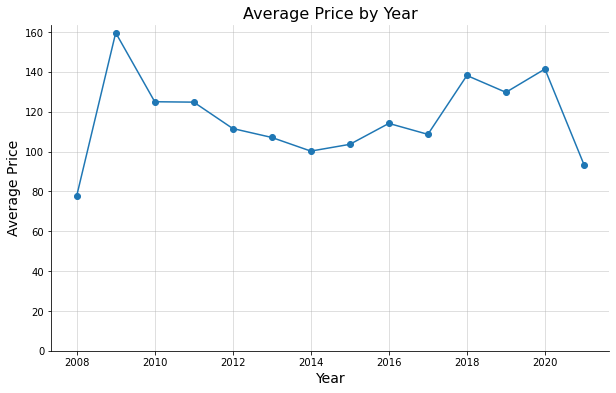

In [119]:
# Plot average price by year
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(paris_listings_over_time.index, paris_listings_over_time['price'], marker='o')

ax.set_title('Average Price by Year', size=16)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Average Price', size=14)

ax.set_ylim(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.5);

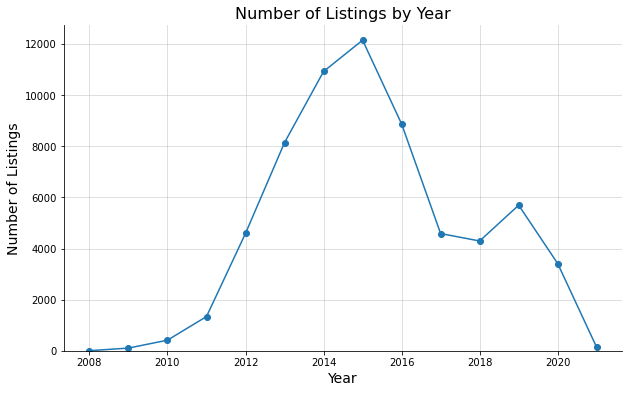

In [120]:
# Plot number of listings by year
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'], marker='o')

ax.set_title('Number of Listings by Year', size=16)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Number of Listings', size=14)

ax.set_ylim(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.5);

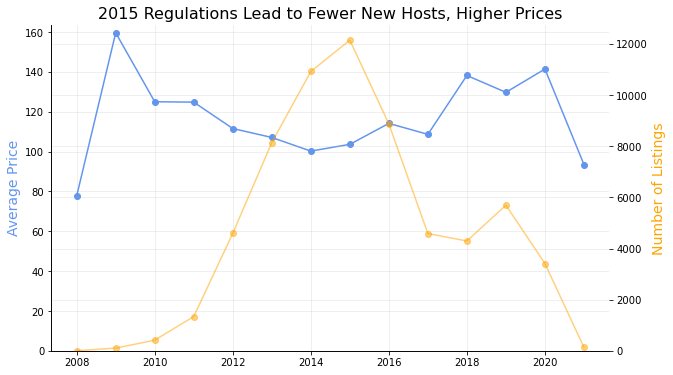

In [167]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
ax.set_title('2015 Regulations Lead to Fewer New Hosts, Higher Prices', size=16)

ax.plot(paris_listings_over_time.index, paris_listings_over_time['price'], marker='o', color='cornflowerblue')
ax.set_ylim(0)
ax.set_ylabel('Average Price', color='cornflowerblue', size=14)
ax.grid(alpha=0.25)

ax2.plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'], marker='o', color='orange', alpha=0.5)
ax2.set_ylabel('Number of Listings', color='orange', size=14)
ax2.set_ylim(0)

ax2.grid(alpha=0.25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#### Insights
- There were very few hosts when Airbnb first launched, but listings took off in 2012 as popularity grew. Listings increased rapidly until 2015 reaching a peak of over 12000 listings. As listings increased and the market became more competitive, prices started to steadily decrease.
- Regulations were put into place in 2015 because there were a lot of complaints about housing prices going up. The goverment put restrictions on who could list and how long they could list for. As a result, the number of listings dropped precipitously in 2016, and bottomed out in 2020 with under 4000 listings.
- Since there were fewer listings, prices started to steadily go back up as there was now less competition in the marketplace. Prices peaked in 2020 with average nightly prices being 140 Euros, an almost 40 Euro increase from 2015.